In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
# import numpy as np
print(np.__file__)


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/numpy/__init__.py


In [3]:
sys.executable


'/home/rfpred/envs/rfenv/bin/python3.11'

In [4]:
# import all the functions within imgproc.py


from funcs.rf_tools import (get_dat, calculate_sigma, calculate_pRF_location, prf_plots_new, prf_plots, make_visrois_dict, 
                            make_gaussian_2d, make_circle_mask, css_gaussian_cut, roi_filter, write_prf_dict, 
                            get_mask, compare_masks, compare_heatmaps, prf_heatmap, rsquare_selection, nsd_R2_dict)
from funcs.utility import print_dict_structure, print_large
from funcs.imgproc import show_stim, get_img_prf

In [5]:
# !pip list
# !conda list

In [6]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))

In [7]:
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

In [8]:
prf_dict = write_prf_dict(binary_masks = vismask_dict)
# print_dict_structure(prf_dict)

In [9]:
R2_dict = nsd_R2_dict(vismask_dict)

Create dictionary for top n R2 explained variance voxels, both for the prf and nsd stimuli separately.

In [10]:
prf_rsq_dict = rsquare_selection(prf_dict, 1000, n_subjects = n_subjects, dataset = 'prf')
nsd_rsq_dict = rsquare_selection(R2_dict, 1000, n_subjects = n_subjects, dataset = 'nsd')

# print_dict_structure(rsq_dict)

In [11]:
prf_info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='gaussian', roi='V4',
                                        plot = 'y', excl_reason = 'n', sigma_min=.1, sigma_max = 4.2)


In [12]:
stront = get_mask(dim=425, subject='subj01', binary_masks = vismask_dict, 
                prf_proc_dict=prf_dict, type='circle', roi='V1',
                plot='y', excl_reason='n', sigma_min=.1, sigma_max=4.2, rand_seed=None)

print_dict_structure(stront)

stront['size']

mask
x
y
pix_radius
deg_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2


0.66057

In [13]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='cut_gaussian', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2, rand_seed=11)


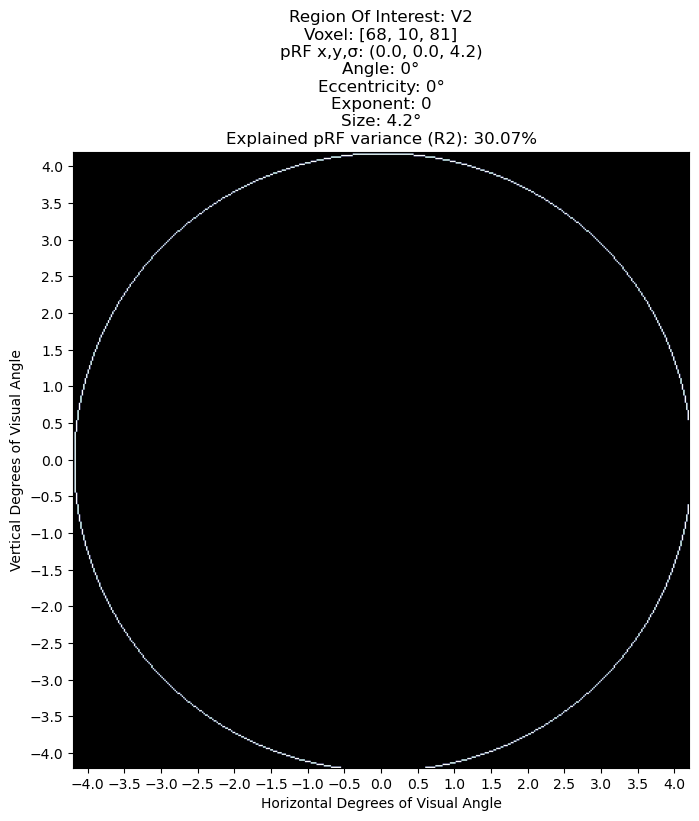

In [14]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2)


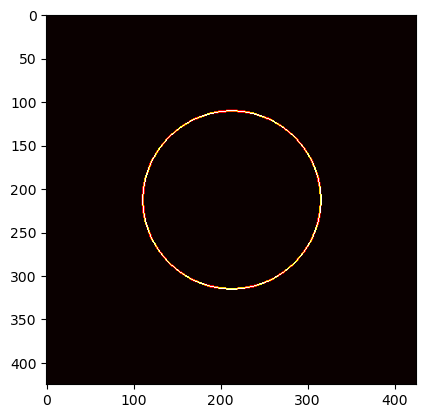

In [15]:
import matplotlib.pyplot as plt

# This is the circle that corresponds to the middle 4 degs
zirkel = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n', margin_width = 2)

plt.imshow(zirkel, cmap = 'hot')
plt.show()
# with np.printoptions(threshold=np.inf):
#     print(zirkel)

mask
x
y
pix_radius
deg_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2

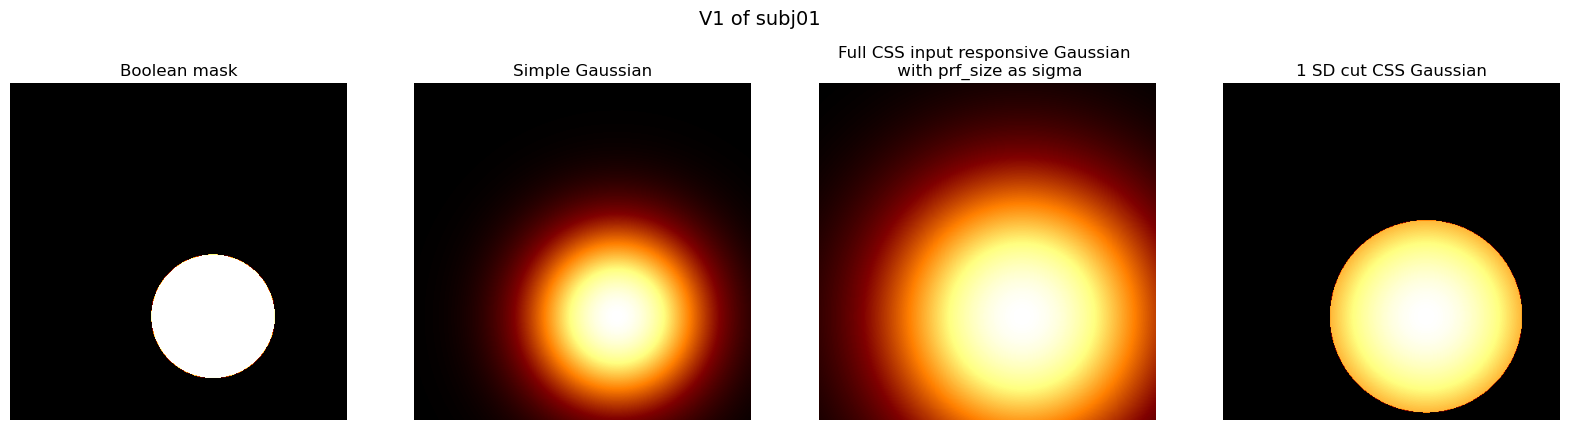

In [16]:
compare_masks(mask_dict =  vismask_dict, prf_dict = prf_dict)

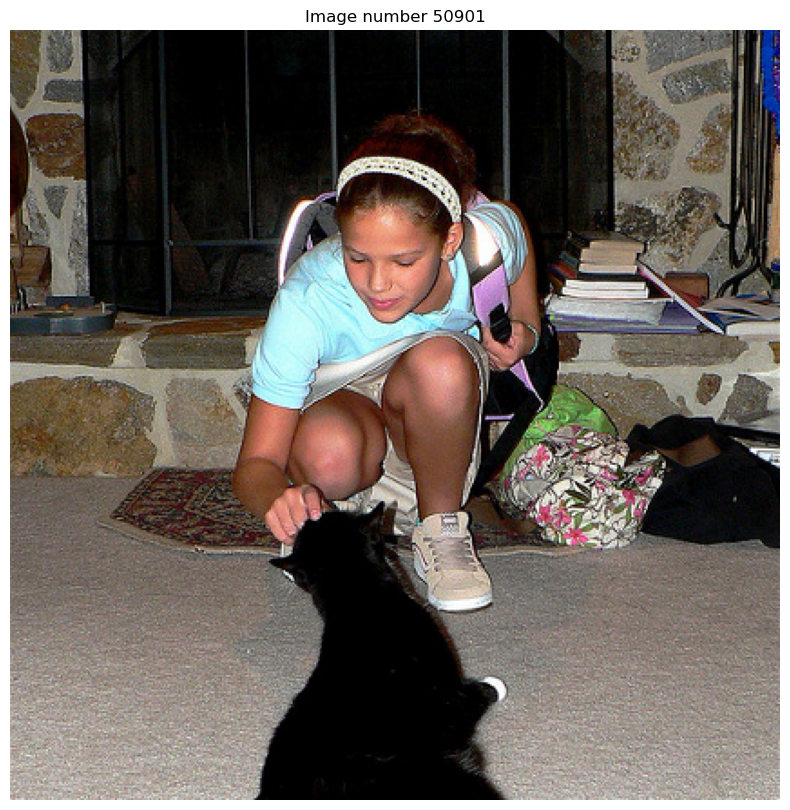

In [17]:
# stim_img, img_no = show_stim(img_no = 209)
stim_img, img_no = show_stim()

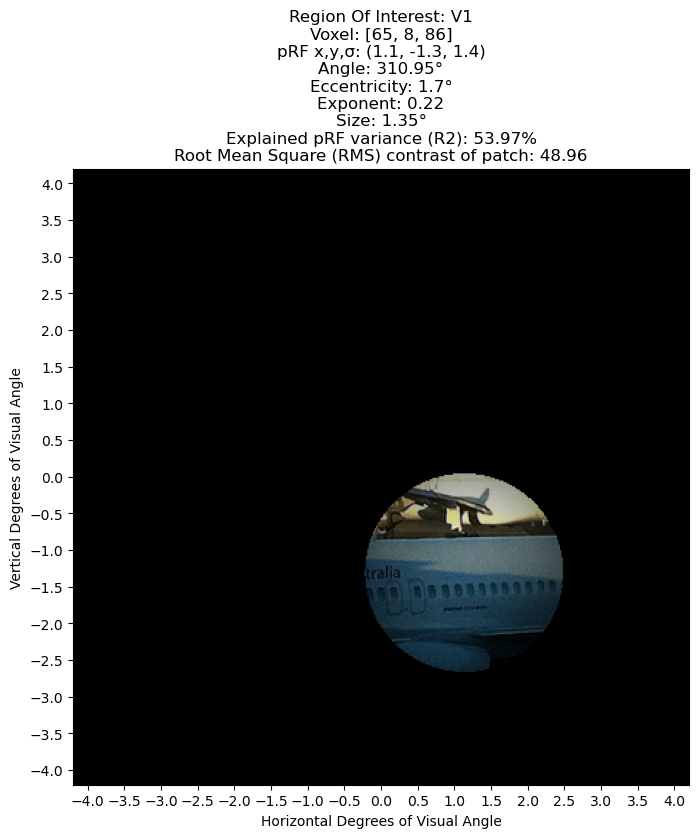

In [18]:
prf_details = get_img_prf(show_stim(hide='y')[0], type='cut_gaussian', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = 1.0, 
            sigma_max = 2, rand_seed=None, invert='n', central = 'n', grid = 'n')


# print(prf_details['size'])

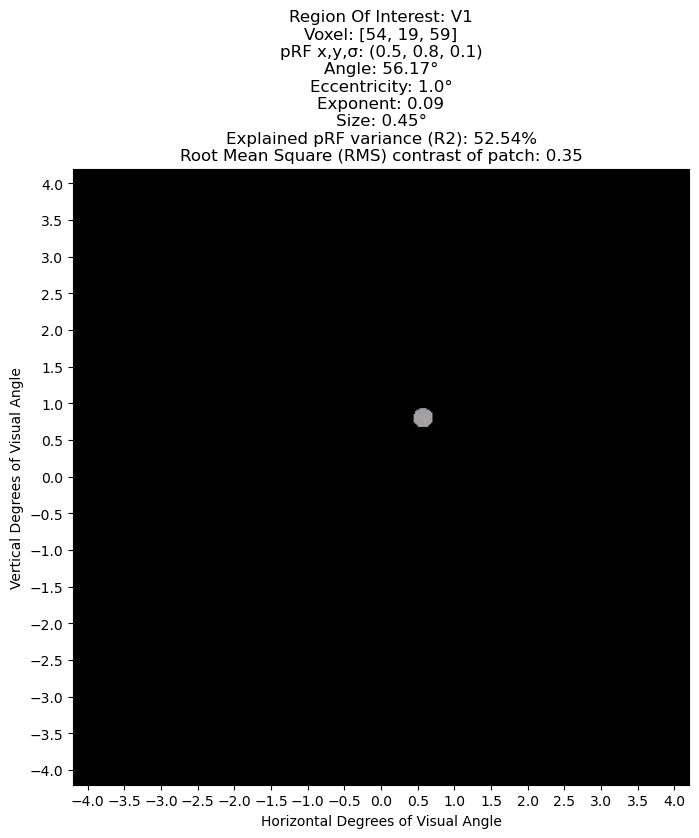

In [19]:
a = get_img_prf(show_stim(hide='y')[0], type='circle', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 2, ecc_max = 1, central='n', invert='n')

Okao nice this works, but I need to do this for every subj and every roi separately, so best to do it inside the heatmap function, as this one maps over that anyway, or well, it doesn't yet over the rois, but I can probably add that.

In [12]:
nsd_rsq_full = nsd_R2_dict(vismask_dict)

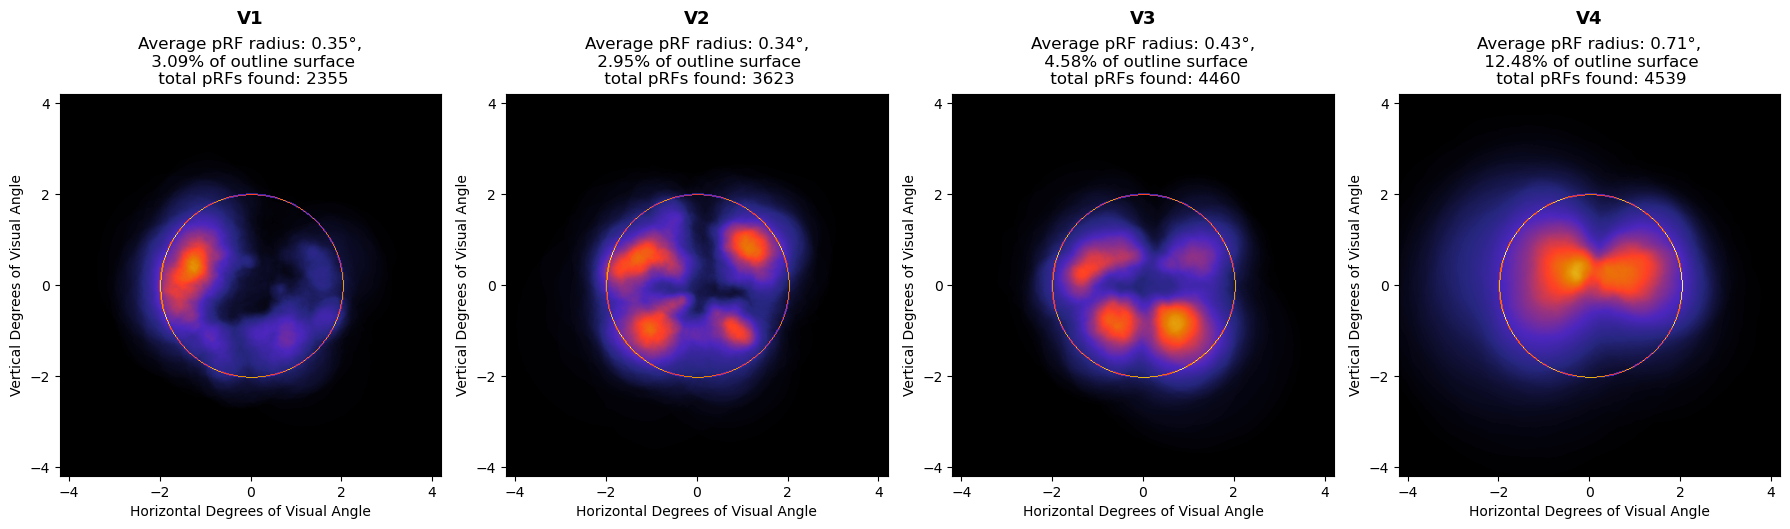

In [13]:
prf_mask_central_loose = compare_heatmaps(n_prfs = 'all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .1, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'n', ecc_strict = 'n')

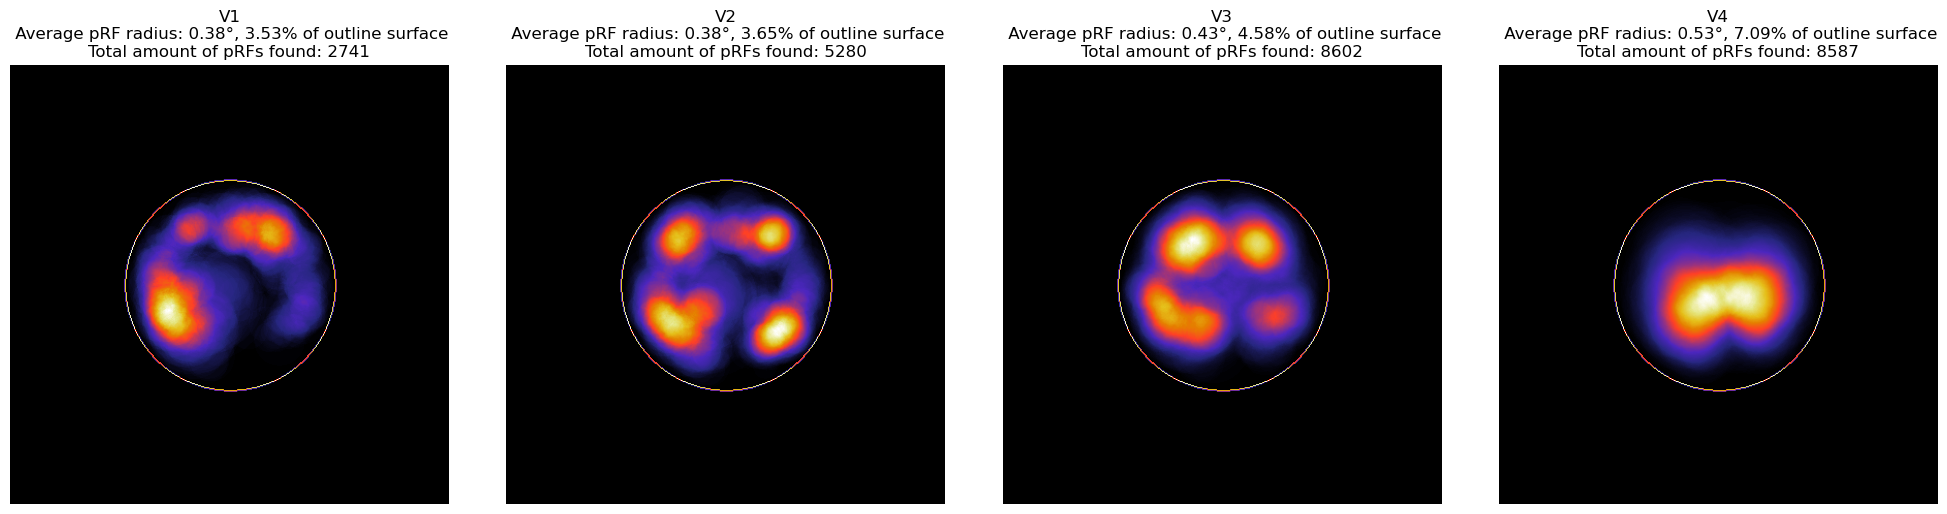

In [35]:
compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = 0.1, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'n', ecc_strict = 'y')

What you see is that including a filter dict makes the code run a lot faster, which makes sense as you use only 1000 voxels instead of +-7500

Subject: subj01, Voxel 1 out of 10 found
Subject: subj01, Voxel 2 out of 10 found
Subject: subj01, Voxel 3 out of 10 found
Subject: subj01, Voxel 4 out of 10 found
Subject: subj01, Voxel 5 out of 10 found
Subject: subj01, Voxel 6 out of 10 found
Subject: subj01, Voxel 7 out of 10 found
Subject: subj01, Voxel 8 out of 10 found
Subject: subj01, Voxel 9 out of 10 found
Subject: subj01, Voxel 10 out of 10 found


Subject: subj02, Voxel 1 out of 10 found
Subject: subj02, Voxel 2 out of 10 found
Subject: subj02, Voxel 3 out of 10 found
Subject: subj02, Voxel 4 out of 10 found
Subject: subj02, Voxel 5 out of 10 found
Subject: subj02, Voxel 6 out of 10 found
Subject: subj02, Voxel 7 out of 10 found
Subject: subj02, Voxel 8 out of 10 found
Subject: subj02, Voxel 9 out of 10 found
Subject: subj02, Voxel 10 out of 10 found


Subject: subj03, Voxel 1 out of 10 found
Subject: subj03, Voxel 2 out of 10 found
Subject: subj03, Voxel 3 out of 10 found
Subject: subj03, Voxel 4 out of 10 found
Subject: s

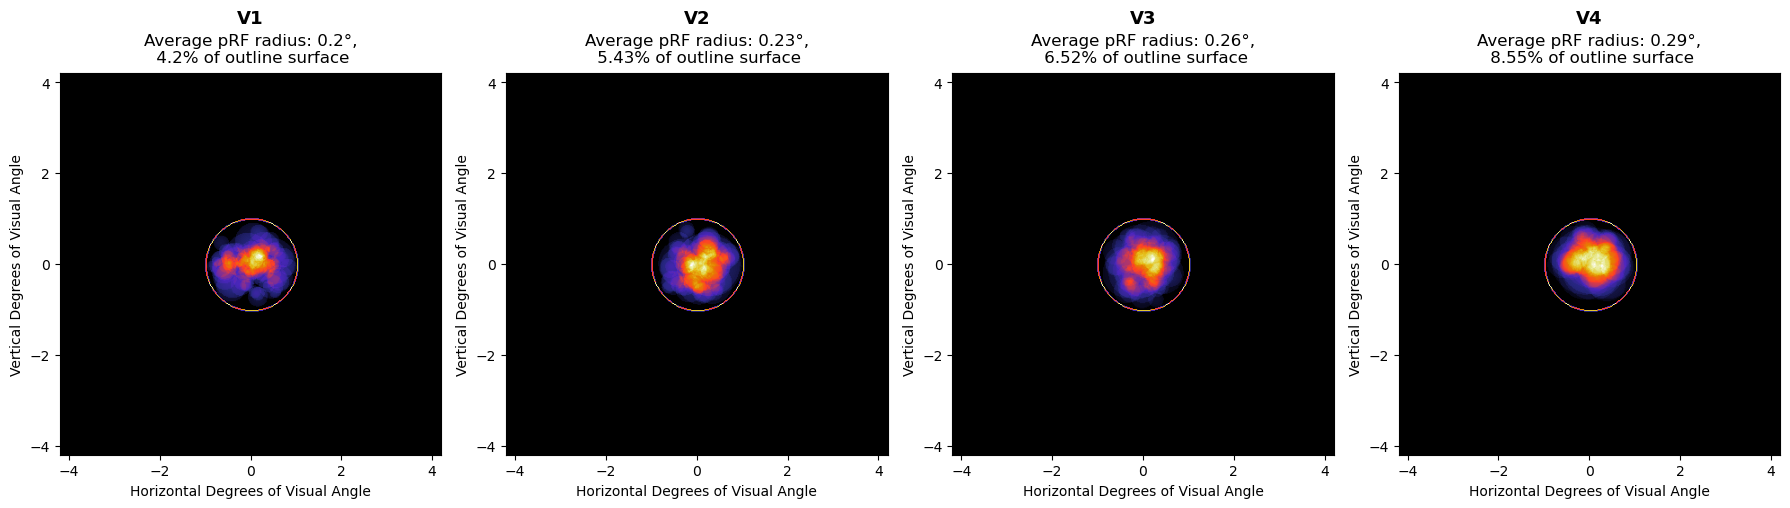

In [35]:
compare_heatmaps(10, binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .1, sigma_max = 1, ecc_max = 1, outline_degs = 1, 
                 filter_dict = None, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

In [45]:
compare_heatmaps_clean('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'full_gaussian', cmap = 'CMRmap',
                 sigma_min = 0.05, sigma_max = 2, ecc_max = 1, outline_degs = 1, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

Subject: subj02, Voxel 1 out of 6476 found
Subject: subj02, Voxel 2 out of 6476 found
Subject: subj02, Voxel 3 out of 6476 found
Subject: subj02, Voxel 4 out of 6476 found
Subject: subj02, Voxel 5 out of 6476 found
Subject: subj02, Voxel 6 out of 6476 found
Subject: subj02, Voxel 7 out of 6476 found
Subject: subj02, Voxel 8 out of 6476 found
Subject: subj02, Voxel 9 out of 6476 found
Subject: subj02, Voxel 10 out of 6476 found
Subject: subj02, Voxel 11 out of 6476 found
Subject: subj02, Voxel 12 out of 6476 found
Subject: subj02, Voxel 13 out of 6476 found
Subject: subj02, Voxel 14 out of 6476 found
Subject: subj02, Voxel 15 out of 6476 found
Subject: subj03, Voxel 1 out of 7358 found
Subject: subj03, Voxel 2 out of 7358 found
Subject: subj03, Voxel 3 out of 7358 found
Subject: subj03, Voxel 4 out of 7358 found
Subject: subj03, Voxel 5 out of 7358 found
Subject: subj03, Voxel 6 out of 7358 found
Subject: subj03, Voxel 7 out of 7358 found
Subject: subj03, Voxel 8 out of 7358 found
Subje

Subject: subj01, Voxel 1 out of 3976 found
Subject: subj01, Voxel 2 out of 3976 found
Subject: subj01, Voxel 3 out of 3976 found
Subject: subj01, Voxel 4 out of 3976 found
Subject: subj01, Voxel 5 out of 3976 found
Subject: subj01, Voxel 6 out of 3976 found
Subject: subj01, Voxel 7 out of 3976 found
Subject: subj01, Voxel 8 out of 3976 found
Subject: subj01, Voxel 9 out of 3976 found
Subject: subj01, Voxel 10 out of 3976 found
Subject: subj01, Voxel 11 out of 3976 found
Subject: subj01, Voxel 12 out of 3976 found
Subject: subj01, Voxel 13 out of 3976 found
Subject: subj01, Voxel 14 out of 3976 found
Subject: subj01, Voxel 15 out of 3976 found
Subject: subj01, Voxel 16 out of 3976 found
Subject: subj01, Voxel 17 out of 3976 found
Subject: subj01, Voxel 18 out of 3976 found
Subject: subj01, Voxel 19 out of 3976 found
Subject: subj01, Voxel 20 out of 3976 found
Subject: subj01, Voxel 21 out of 3976 found
Subject: subj01, Voxel 22 out of 3976 found
Subject: subj01, Voxel 23 out of 3976 fou

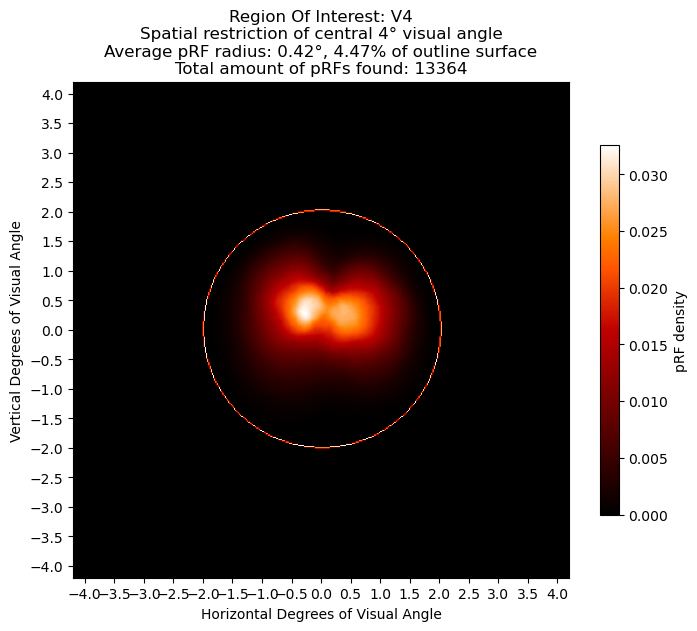

Runtime: 73.109 seconds
There were 997 out of 3976 pRFs considered


In [192]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                                        mask_type='cut_gaussian', cmap='gist_heat', print_prog='y', 
                                                        roi='V4', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                                        outline_degs = 2, 
                                                        filter_dict = nsd_rsq_dict, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

In [193]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                                        mask_type='cut_gaussian', cmap='gist_heat', print_prog='y', 
                                                        roi='V4', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                                        outline_degs = 2, 
                                                        filter_dict = None, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

Subject: subj01, Voxel 1 out of 3976 found
Subject: subj01, Voxel 2 out of 3976 found
Subject: subj01, Voxel 3 out of 3976 found
Subject: subj01, Voxel 4 out of 3976 found
Subject: subj01, Voxel 5 out of 3976 found
Subject: subj01, Voxel 6 out of 3976 found
Subject: subj01, Voxel 7 out of 3976 found
Subject: subj01, Voxel 8 out of 3976 found
Subject: subj01, Voxel 9 out of 3976 found
Subject: subj01, Voxel 10 out of 3976 found
Subject: subj01, Voxel 11 out of 3976 found
Subject: subj01, Voxel 12 out of 3976 found
Subject: subj01, Voxel 13 out of 3976 found
Subject: subj01, Voxel 14 out of 3976 found
Subject: subj01, Voxel 15 out of 3976 found
Subject: subj01, Voxel 16 out of 3976 found
Subject: subj01, Voxel 17 out of 3976 found
Subject: subj01, Voxel 18 out of 3976 found
Subject: subj01, Voxel 19 out of 3976 found
Subject: subj01, Voxel 20 out of 3976 found
Subject: subj01, Voxel 21 out of 3976 found
Subject: subj01, Voxel 22 out of 3976 found
Subject: subj01, Voxel 23 out of 3976 fou

Runtime: 142.061 seconds
There were 2843 out of 3976 pRFs considered


### Here I'm building a novel version of the prf_heatmap function that automatically returns a vismask_dict-like dictionary but now only with the voxels that passed all the criteria that were imposed in the called fucntion.

In [46]:
# from matplotlib.ticker import MultipleLocator
# class AllPRFConsidered(Exception):
#     pass

# def get_mask(dim = 200, subject = 'subj01', binary_masks = None, 
#              prf_proc_dict = None, type = 'full_gaussian', roi = 'V2', 
#              plot = 'y', heatmap = 'n', prf_vec = None, iter = None, excl_reason = 'n', 
#              sigma_min = 0, sigma_max = 4.2, ecc_min = 0, ecc_max = 4.2, rand_seed = None, filter_dict = None, 
#              ecc_strict = None, grid = 'n', fill_outline = 'n', area = 'central'):

#     if rand_seed == None:
#         random.seed(random.randint(1, 1000000))
#     else:
#         random.seed(rand_seed)
    
#     # Construct the variable name for binary mask using roi argument CHECK IF I USE THIS
#     roi_flt = binary_masks[subject][f'{roi}_mask']
    
#     # Create objects for all the required pRF data
#     roi_mask_data = prf_proc_dict[subject]['proc'][f'{roi}_mask']
#     angle_roi, ecc_roi, expt_roi, size_roi, rsq_roi= roi_mask_data['angle'], roi_mask_data['eccentricity'], roi_mask_data['exponent'], roi_mask_data['size'], roi_mask_data['R2']

#     # Define a mask to filter away data rows based on the filter_dict, which is supposed to be
#     # a dictionary that includes a subset of filtered values for every subject, roi, based on
#     # another parameter, such as explained mean variance, R2.
#     if filter_dict != None:
#         smaller_xyz = filter_dict[subject][f'{roi}_mask'][:, :3]
#         mask = np.any(np.all(angle_roi[:, None, :3] == smaller_xyz, axis=-1), axis=1)
#     else:
#         mask = range(0, angle_roi.shape[0])
    
#     # Condition for when the function is used to plot a heatmap, set to 'y', or any other value to do so
#     if heatmap == 'n':
#         prf_vec = random.sample(range(angle_roi[mask].shape[0]), angle_roi[mask].shape[0])
#         iter = 0

#     max_prf_vec = max(prf_vec)  # Maximum value of prf_vec

#     while True:
#         if iter >= max_prf_vec:
#             raise AllPRFConsidered("All potential pRFs have been considered")

#         n = prf_vec[iter]
#         iter += 1

#         prf_angle, prf_ecc, prf_expt, prf_size, prf_rsq = angle_roi[mask][n][3], ecc_roi[mask][n][3], expt_roi[mask][n][3], size_roi[mask][n][3], rsq_roi[mask][n][3]
#         x_vox, y_vox, z_vox = int(angle_roi[mask][n][0]), int(angle_roi[mask][n][1]), int(angle_roi[mask][n][2])

#         sigma = prf_size * np.sqrt(prf_expt)
#         sigma_pure = sigma * (dim / 8.4)
#         outer_bound = inner_bound = prf_ecc
        
        
#         # Condition to regulate the strictness of maximum eccentricity values
#         if ecc_strict == 'y':
#             outer_bound = prf_ecc + prf_size
#             inner_bound = np.abs(prf_ecc - prf_size)
        
#         # Sinus is used to calculate height, cosinus width
#         # so c_index is the y coordinate and r_index is the x coordinate. 
#         # the * (dim / 8.4) is the factor to translate it into raw pixel values
        
#         y = ((1 + dim) / 2) - (prf_ecc * np.sin(np.radians(prf_angle)) * (dim / 8.4)) #y in pix (c_index)
#         x = ((1 + dim) / 2) + (prf_ecc * np.cos(np.radians(prf_angle)) * (dim / 8.4)) #x in pix (r_index)

#         degrees_per_pixel = 8.4 / dim

#         if type == 'circle' or type == 'gaussian':
#             deg_radius = sigma
#             pix_radius = sigma_pure
#         elif type == 'cut_gaussian' or type == 'full_gaussian' or type == 'outline':
#             deg_radius = prf_size
#             pix_radius = prf_size * (dim / 8.4)
        
#         if area == 'central':
#             valid_conditions = (
#                 0 < x < dim,
#                 0 < y < dim,
#                 sigma_min < deg_radius,
#                 deg_radius < sigma_max,
#                 outer_bound < ecc_max,
#                 ecc_min < inner_bound,
#                 prf_ecc > ecc_min
#                 # prf_expt > 0
#             )
#         # elif area == 'periphery':
#         #     valid_conditions = (                
#         #         0 < x < dim,
#         #         0 < y < dim,
#         #         sigma_min < deg_radius,
#         #         deg_radius < sigma_max,
#         #         outer_bound > ecc_min,
#         #         # prf_expt > 0)

#         if all(valid_conditions):
#             break

#         # Check for argument option to print reason for excluding voxels
#         elif excl_reason == 'y':
#             print(f"Discarding pRF mask for voxel [{x_vox}, {y_vox}, {z_vox}] due to:")
#             if not valid_conditions[0]:
#                 print("   - x out of bounds")
#             if not valid_conditions[1]:
#                 print("   - y out of bounds")
#             if not valid_conditions[2]:
#                 print("   - sigma_pure too small")
#             if not valid_conditions[3]:
#                 print("   - sigma_pure too large")
#             if not valid_conditions[4]:
#                 print(f"   -  pRF outside of center {2 * ecc_max}° visual degrees")
#             # if not valid_conditions[4]:
#             #     print("   - expt_ar value too small")

#     # Note: all the masks are made using pixel values for x, y, and sigma
#     # Check whether the same is done later on, in the heatmaps and get_img_prf.
#     if type == 'gaussian':
#         prf_mask = make_gaussian_2d(dim, x, y, sigma_pure)
#     elif type == 'circle':
#         prf_mask = make_circle_mask(dim, x, y, sigma_pure)
#     elif type == 'full_gaussian':
#         prf_mask = make_gaussian_2d(dim, x, y, prf_size * (dim / 8.4))
#     elif type == 'cut_gaussian':
#         prf_mask = css_gaussian_cut(dim, x, y, prf_size * (dim / 8.4))
#     elif type == 'outline':
#         x = y = ((dim + 2)/2)
#         x_deg = y_deg = prf_angle = prf_ecc = prf_expt = 0
#         deg_radius = prf_size = ecc_max
#         prf_mask = (make_circle_mask(dim, ((dim+2)/2), ((dim+2)/2), ecc_max * (dim / 8.4), fill = fill_outline))
#     else:
#         raise ValueError(f"Invalid type: {type}. Available mask types are 'gaussian','circle','full_gaussian','cut_gaussian', and 'outline'.")
    
#     # Convert pixel indices to degrees of visual angle
#     x_deg = (x - ((dim + 2) / 2)) * degrees_per_pixel
#     y_deg = (((dim + 2) / 2) - y) * degrees_per_pixel
    
#     if plot == 'y':
#         fig, ax = plt.subplots(figsize=(8, 8))
#         ax.imshow(prf_mask, cmap='bone', origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
#         ax.set_title(f'Region Of Interest: {roi}\n'
#                     f'Voxel: [{x_vox}, {y_vox}, {z_vox}]\n'
#                     f'pRF x,y,σ: {round(x_deg, 1), round(y_deg, 1), round(deg_radius, 1)}\n'
#                     f'Angle: {round(prf_angle, 2)}°\nEccentricity: {round(prf_ecc, 2)}°\n'
#                     f'Exponent: {round(prf_expt, 2)}\nSize: {round(prf_size, 2)}°\n'
#                     f'Explained pRF variance (R2): {round(prf_rsq, 2)}%')
#         ax.set_xlabel('Horizontal Degrees of Visual Angle')
#         ax.set_ylabel('Vertical Degrees of Visual Angle')

#         # Set ticks at every 0.1 step
#         ax.xaxis.set_major_locator(MultipleLocator(0.5))
#         ax.yaxis.set_major_locator(MultipleLocator(0.5))
        
#         if grid == 'y':
#             ax.grid(which='both', linestyle='--', linewidth=0.5, color='black')


#             # Create a dictionary to store the output values
#     prf_output_dict = {
#         'mask': prf_mask,
#         'x': x,
#         'y': y,
#         'pix_radius': pix_radius,
#         'deg_radius': deg_radius, 
#         'iterations': iter,
#         'x_vox': x_vox,
#         'y_vox': y_vox,
#         'z_vox': z_vox,
#         'x_deg': x_deg,
#         'y_deg': y_deg,
#         'angle': prf_angle,
#         'eccentricity': prf_ecc,
#         'exponent': prf_expt,
#         'size': prf_size,
#         'R2': prf_rsq
#     }

#         # Return the dictionary
#     return prf_output_dict


In [21]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='cut_gaussian', roi='V2',
                                        plot = 'y', excl_reason = 'n', ecc_min = 2, ecc_max = 4.2, 
                                        sigma_min=1, sigma_max = 4.2, rand_seed=None)


In [48]:

# def prf_heatmap(n_prfs, binary_masks, prf_proc_dict, dim=425, mask_type='gaussian', cmap='gist_heat', 
#                 roi='V2', sigma_min=1, sigma_max=25, ecc_min = 0, ecc_max = 4.2, print_prog='n', excl_reason = 'n', subjects='all',
#                 outline_degs = None, filter_dict = None, fill_outline = 'n', plot_heat = 'y', ecc_strict = None, grid = 'n'):
    
#     # Create new dictionary to store the filtered voxels that pass the pRF requirements imposed
#     prfmask_dict = copy.deepcopy(binary_masks)
    
#     outline_surface = np.pi * outline_degs**2
#     prf_sumstack = []
#     prf_sizes = []
#     total_prfs_found = 0
#     if subjects == 'all':
#         subjects = list(binary_masks)
#     else:
#         subjects = [subjects]
        
#     # To make sure that the maximum amount of pRFs that is searched through is adapted to the individual
#     for subject in subjects:
#         # This is to make sure that the random sampling is done correctly, for different restrictions on the amount of
#         # pRFs to sample from. This can be restricted through exclusion criteria, or for example the filter_dict.
#         if filter_dict != None:
#             smaller_xyz = filter_dict[subject][f'{roi}_mask'][:, :3]
#             # filter = np.any(np.all(binary_masks[subject][f'{roi}_mask'][:, None, :3] == smaller_xyz, axis=-1), axis=1)
#             filter = np.any(np.all(prf_proc_dict[subject]['proc'][f'{roi}_mask']['angle'][:, None, :3] == smaller_xyz, axis=-1), axis=1)
#             roi_flt = filter_dict[subject][f'{roi}_mask'].shape[0] # Amount of voxels in top rsq dict for subj, roi
#             prf_vec = random.sample(range(roi_flt), roi_flt) # Create random vector to shuffle order voxels to consider
            
#         else:
#             filter = range(0, prf_proc_dict[subject]['proc'][f'{roi}_mask']['angle'].shape[0])
#             roi_flt = np.sum(binary_masks[subject][f'{roi}_mask']).astype('int') # This is the total number of voxels for subj, roi
#             prf_vec = random.sample(range(roi_flt), roi_flt) # Create random vector to shuffle order voxels to consider
#             # prf_vec = random.sample(range(np.sum(roi_flt)), np.sum(roi_flt)) # Idem dito as in the 'if' part
            
#         # FIX THIS STILL!!! ??
#         if n_prfs == 'all':
#             n_prfs_subject = np.sum(binary_masks[subject][f'{roi}_mask']) # This does not work. I think it does now
#             # n_prfs_subject = random.randint(10,20)
#         else:
#             n_prfs_subject = n_prfs

#         # Create an empty array to fill with the masks
#         prf_single = np.zeros([dim, dim, n_prfs_subject])

#         # Set the filtered dictionary values to zero
#         prfmask_dict[subject][f'{roi}_mask'] = np.zeros(binary_masks[subject][f'{roi}_mask'].shape)
        
#         iter = 0
#         end_premat = False
#         for prf in range(n_prfs_subject):
#             try:
#                 # prf_single[:, :, prf], _, _, _, new_iter = get_mask(dim=dim,
#                 prf_dict = get_mask(dim=dim,
#                                     subject=subject,
#                                     binary_masks=binary_masks,
#                                     prf_proc_dict=prf_proc_dict,
#                                     type=mask_type,
#                                     roi=roi,
#                                     plot='n',
#                                     heatmap='y',
#                                     prf_vec=prf_vec,
#                                     iter=iter,
#                                     sigma_min=sigma_min,
#                                     sigma_max=sigma_max,
#                                     ecc_min = ecc_min,
#                                     ecc_max = ecc_max,
#                                     excl_reason=excl_reason,
#                                     filter_dict = filter_dict,
#                                     ecc_strict = ecc_strict,
#                                     grid = grid)
                
#                 prf_single[:, :, prf] = prf_dict['mask']
#                 iter = prf_dict['iterations']
#                 prf_size = prf_dict['size']
#                 prf_sizes.append(prf_size)
                
#                 prfmask_dict[subject][f'{roi}_mask'][prf_dict['x_vox']][prf_dict['y_vox']][prf_dict['z_vox']] = 1
                
#                 if print_prog == 'y':
#                     print(f"Subject: {subject}, Voxel {prf+1} out of {n_prfs_subject} found")
#                     if (prf+1) == n_prfs_subject:
#                         print('\n')
#             except AllPRFConsidered:
#                 if prf >= n_prfs_subject:
#                     print(f'All potential pRFs have been considered at least once.\n'
#                         f'Total amount of pRFs found: {len(prf_sizes)}')
#                     end_premat = True
                    
#                 break  # Exit the loop immediately
        
#         prf_sumstack.append(np.mean(prf_single, axis=2))
#         total_prfs_found += len(prf_sizes)
         
#     avg_prf_surface = np.pi * np.mean(prf_sizes)**2
#     relative_surface = round(((avg_prf_surface / outline_surface) * 100), 2)
#     # Combine heatmaps of all subjects
#     prf_sum_all_subjects = np.mean(np.array(prf_sumstack), axis=0)
#     outline = make_circle_mask(425, 213, 213, outline_degs * 425/8.4, fill=fill_outline)
#     # Create a circle outline if an array is provide in the outline argument (should be same dimensions, binary)
#     prf_sum_all_subjects += (np.max(prf_sum_all_subjects) * outline) if outline_degs is not None else 1

#     # Display the plot
#     fig, ax = plt.subplots(figsize=(8, 8))
#     im = ax.imshow(prf_sum_all_subjects, cmap=cmap, origin='lower', extent=[-4.2, 4.2, -4.2, 4.2])
#     ax.set_title(f'Region Of Interest: {roi}\n'
#                  f'Spatial restriction of central {2 * ecc_max}° visual angle\n'
#                  f'Average pRF radius: {round(np.mean(prf_sizes), 2)}°, {relative_surface}% of outline surface\n'
#                  f'Total amount of pRFs found: {total_prfs_found}')
#     ax.set_xlabel('Horizontal Degrees of Visual Angle')
#     ax.set_ylabel('Vertical Degrees of Visual Angle')
#     cbar = plt.colorbar(im, ax=ax, shrink = .6)
#     cbar.set_label('pRF density')  
    
#     # Set ticks at every 0.1 step
#     ax.xaxis.set_major_locator(MultipleLocator(0.5))
#     ax.yaxis.set_major_locator(MultipleLocator(0.5))

#     if plot_heat == 'n':
#         plt.close()
#     else: 
#         plt.show()

#     return prf_sum_all_subjects, iter, end_premat, roi, prf_sizes, relative_surface, total_prfs_found, prfmask_dict

Subject: subj01, Voxel 1 out of 100 found
Subject: subj01, Voxel 2 out of 100 found
Subject: subj01, Voxel 3 out of 100 found
Subject: subj01, Voxel 4 out of 100 found
Subject: subj01, Voxel 5 out of 100 found
Subject: subj01, Voxel 6 out of 100 found
Subject: subj01, Voxel 7 out of 100 found
Subject: subj01, Voxel 8 out of 100 found
Subject: subj01, Voxel 9 out of 100 found
Subject: subj01, Voxel 10 out of 100 found
Subject: subj01, Voxel 11 out of 100 found
Subject: subj01, Voxel 12 out of 100 found
Subject: subj01, Voxel 13 out of 100 found
Subject: subj01, Voxel 14 out of 100 found
Subject: subj01, Voxel 15 out of 100 found
Subject: subj01, Voxel 16 out of 100 found
Subject: subj01, Voxel 17 out of 100 found
Subject: subj01, Voxel 18 out of 100 found
Subject: subj01, Voxel 19 out of 100 found
Subject: subj01, Voxel 20 out of 100 found
Subject: subj01, Voxel 21 out of 100 found
Subject: subj01, Voxel 22 out of 100 found
Subject: subj01, Voxel 23 out of 100 found
Subject: subj01, Vox

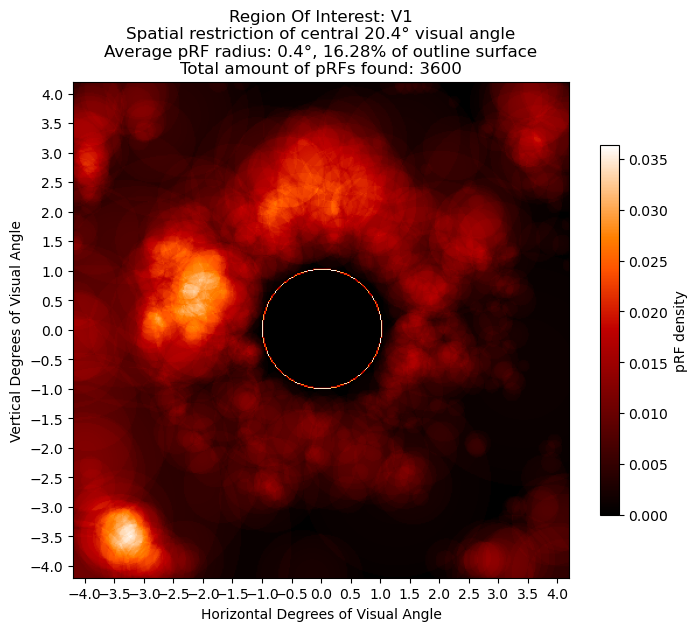

Runtime: 24.755 seconds
There were 274 out of 7887 pRFs considered


In [52]:
# Working heatmap call script.
from matplotlib.ticker import MultipleLocator
import copy

import time


start = time.time()

heatmap_full, iter, end_premat, roi, prf_sizes, avg_surf, total_prfs, prfmask_dict = prf_heatmap(100, binary_masks=vismask_dict, prf_proc_dict=prf_dict, 
                                                  mask_type='cut_gaussian', cmap='gist_heat',print_prog='y', roi='V1', ecc_min = 1,
                                                  sigma_min=0.1, sigma_max=3.2, ecc_max = 10.2, subjects='all', 
                                                  outline_degs = 1, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

In [277]:
# def compare_heatmaps(n_prfs, binary_masks=None, prf_proc_dict=None, filter_dict=None, basis='roi',
#                      mask_type='cut_gaussian', cmap='CMRmap', roi='V1', excl_reason='n', sigma_min=0,
#                      sigma_max=4.2, ecc_min = 0, ecc_max=2, print_prog='n', outline_degs=None, fill_outline='n', ecc_strict=None, grid='n'):
#     if basis == 'roi':
#         rois = sorted(prf_proc_dict['subj01']['proc'].keys())

#     prfmask_dict_all = copy.deepcopy(binary_masks)

#     def plot_mask(ax, mask, title, subtitle='aars', last=None, extent=[-4.2, 4.2, -4.2, 4.2]):
#         img = ax.imshow(mask, cmap=cmap, extent=extent)
#         ax.set_title(title, fontsize = 13, weight = 'semibold')
        
#         if subtitle:
#             ax.text(0.5, 1.02, subtitle, transform=ax.transAxes,
#                     ha='center', va='bottom', fontsize=12)  # Adjust fontsize as needed
        
#         ax.set_xlabel('Horizontal Degrees of Visual Angle')
#         ax.set_ylabel('Vertical Degrees of Visual Angle')
#         ax.xaxis.set_major_locator(MultipleLocator(2))
#         ax.yaxis.set_major_locator(MultipleLocator(2))

#     fig, axs = plt.subplots(1, 4, figsize=(18, 5))

#     for n, roi in enumerate(rois):
                
#         heatmap, iter, end_premat, roi, prf_sizes, rel_surf, total_prfs_found, prfmask_dict_all = prf_heatmap(
#                                     n_prfs, binary_masks=prfmask_dict_all, prf_proc_dict=prf_proc_dict,
#                                     mask_type=mask_type, cmap=cmap, roi=roi[:2], excl_reason=excl_reason,
#                                     sigma_min=sigma_min, sigma_max=sigma_max, ecc_min = ecc_min, ecc_max=ecc_max,
#                                     print_prog=print_prog, subjects='all', outline_degs=outline_degs,
#                                     filter_dict=filter_dict, fill_outline=fill_outline, plot_heat='n',
#                                     ecc_strict=ecc_strict, grid=grid)

        

#         last_plot = 'y' if n == (len(rois) - 1) else 'n'
#         plot_mask(axs[n], heatmap, f'{roi}\n\n', f'Average pRF radius: {round(np.mean(prf_sizes), 2)}°,\n {rel_surf}% of outline surface', last=last_plot)
    
#     plt.tight_layout()
#     plt.show()
    
#     return prfmask_dict_all

Subject: subj01, Voxel 1 out of 7887 found
Subject: subj01, Voxel 2 out of 7887 found
Subject: subj01, Voxel 3 out of 7887 found
Subject: subj01, Voxel 4 out of 7887 found
Subject: subj01, Voxel 5 out of 7887 found
Subject: subj01, Voxel 6 out of 7887 found
Subject: subj01, Voxel 7 out of 7887 found
Subject: subj01, Voxel 8 out of 7887 found
Subject: subj01, Voxel 9 out of 7887 found
Subject: subj01, Voxel 10 out of 7887 found
Subject: subj01, Voxel 11 out of 7887 found
Subject: subj01, Voxel 12 out of 7887 found
Subject: subj01, Voxel 13 out of 7887 found
Subject: subj01, Voxel 14 out of 7887 found
Subject: subj01, Voxel 15 out of 7887 found
Subject: subj01, Voxel 16 out of 7887 found
Subject: subj01, Voxel 17 out of 7887 found
Subject: subj01, Voxel 18 out of 7887 found
Subject: subj01, Voxel 19 out of 7887 found
Subject: subj01, Voxel 20 out of 7887 found
Subject: subj01, Voxel 21 out of 7887 found
Subject: subj01, Voxel 22 out of 7887 found
Subject: subj01, Voxel 23 out of 7887 fou

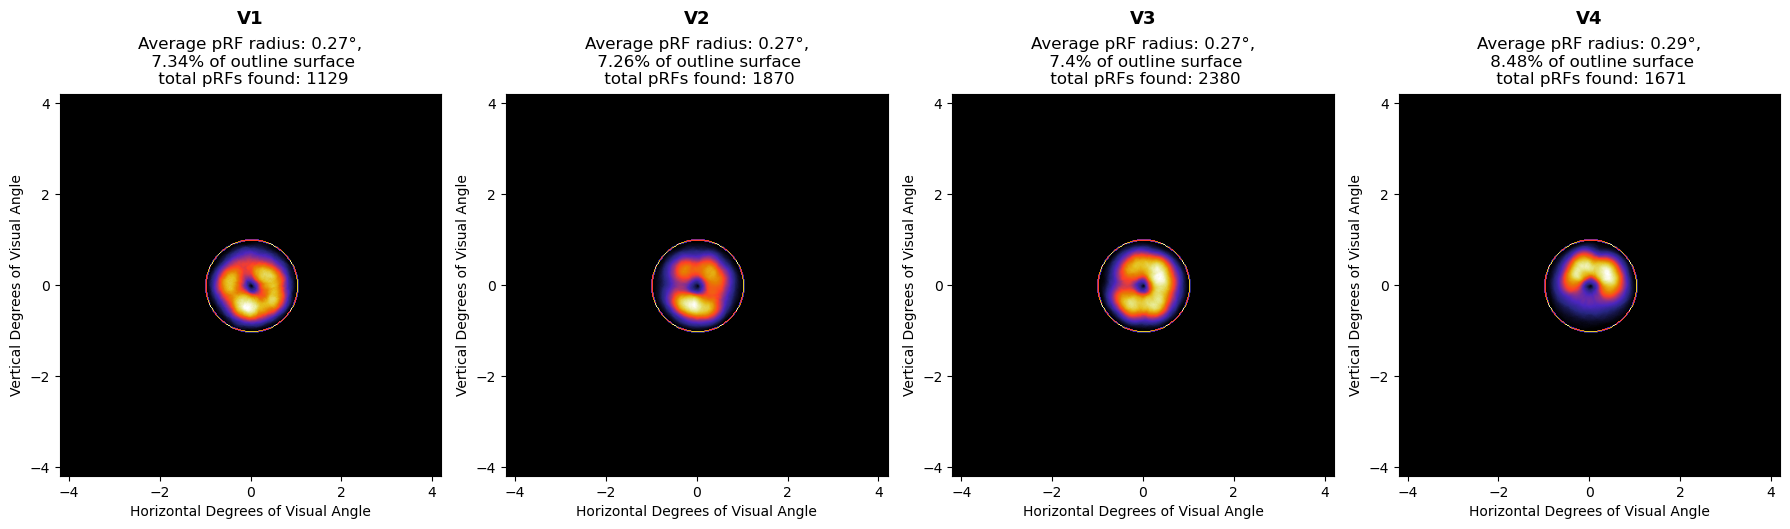

In [27]:
prfmasks_test = compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .2, sigma_max = 1, ecc_max = 1, outline_degs = 1, 
                 filter_dict = None, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

In [37]:

import copy
from matplotlib.ticker import MultipleLocator

def compare_heatmaps(n_prfs, binary_masks=None, prf_proc_dict=None, filter_dict=None, basis='roi',
                     mask_type='cut_gaussian', cmap='CMRmap', roi='V1', excl_reason='n', sigma_min=0,
                     sigma_max=4.2, ecc_min = 0, ecc_max=2, print_prog='n', outline_degs=None, fill_outline='n', ecc_strict=None, grid='n'):
    if basis == 'roi':
        rois = sorted(prf_proc_dict['subj01']['proc'].keys())

    prfmask_dict_all = copy.deepcopy(binary_masks)

    def plot_mask(ax, mask, title, subtitle='aars', last=None, extent=[-4.2, 4.2, -4.2, 4.2]):
        img = ax.imshow(mask, cmap=cmap, extent=extent)
        ax.set_title(title, fontsize = 13, weight = 'semibold')
        
        if subtitle:
            ax.text(0.5, 1.02, subtitle, transform=ax.transAxes,
                    ha='center', va='bottom', fontsize=12)  # Adjust fontsize as needed
        
        ax.set_xlabel('Horizontal Degrees of Visual Angle')
        ax.set_ylabel('Vertical Degrees of Visual Angle')
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_major_locator(MultipleLocator(2))

    fig, axs = plt.subplots(1, 4, figsize=(18, 5))

    for n, roi in enumerate(rois):
                
        heatmap, iter, end_premat, roi, prf_sizes, rel_surf, total_prfs_found, prfmask_dict_all = prf_heatmap(
                                    n_prfs, binary_masks=prfmask_dict_all, prf_proc_dict=prf_proc_dict,
                                    mask_type=mask_type, cmap=cmap, roi=roi[:2], excl_reason=excl_reason,
                                    sigma_min=sigma_min, sigma_max=sigma_max, ecc_min = ecc_min, ecc_max=ecc_max,
                                    print_prog=print_prog, subjects='all', outline_degs=outline_degs,
                                    filter_dict=filter_dict, fill_outline=fill_outline, plot_heat='n',
                                    ecc_strict=ecc_strict, grid=grid)

        

        last_plot = 'y' if n == (len(rois) - 1) else 'n'
        plot_mask(axs[n], heatmap, f'{roi}\n\n\n', f'Average pRF radius: {round(np.mean(prf_sizes), 2)}°,\n {rel_surf}% of outline surface\n total pRFs found: {len(prf_sizes)}', last=last_plot)
    
    plt.tight_layout()
    plt.show()
    
    return prfmask_dict_all

Subject: subj01, Voxel 1 out of 7887 found
Subject: subj01, Voxel 2 out of 7887 found
Subject: subj01, Voxel 3 out of 7887 found
Subject: subj01, Voxel 4 out of 7887 found
Subject: subj01, Voxel 5 out of 7887 found
Subject: subj01, Voxel 6 out of 7887 found
Subject: subj01, Voxel 7 out of 7887 found
Subject: subj01, Voxel 8 out of 7887 found
Subject: subj01, Voxel 9 out of 7887 found
Subject: subj01, Voxel 10 out of 7887 found
Subject: subj01, Voxel 11 out of 7887 found
Subject: subj01, Voxel 12 out of 7887 found
Subject: subj01, Voxel 13 out of 7887 found
Subject: subj01, Voxel 14 out of 7887 found
Subject: subj01, Voxel 15 out of 7887 found
Subject: subj01, Voxel 16 out of 7887 found
Subject: subj01, Voxel 17 out of 7887 found
Subject: subj01, Voxel 18 out of 7887 found
Subject: subj01, Voxel 19 out of 7887 found
Subject: subj01, Voxel 20 out of 7887 found
Subject: subj01, Voxel 21 out of 7887 found
Subject: subj01, Voxel 22 out of 7887 found
Subject: subj01, Voxel 23 out of 7887 fou

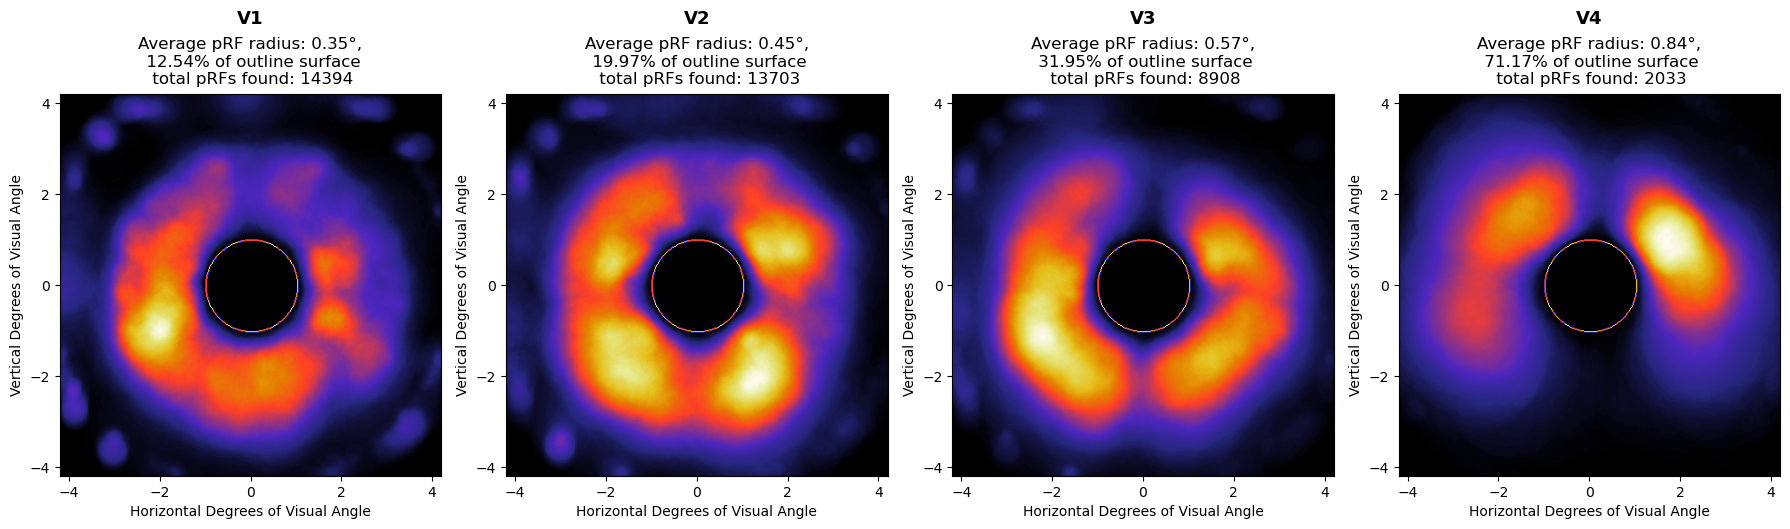

In [42]:
prf_mask_periphery_strict = compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .1, sigma_max = 4.2, ecc_min = 1, ecc_max = 5.2, outline_degs = 1, 
                 filter_dict = None, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

In [15]:
import pickle
# # Save the masks to a local pickle file
with open('./data/custom_files/subj01/prf_mask_central_loose.pkl', 'wb') as fp:
    pickle.dump(prf_mask_central_loose, fp)
    print('dictionary saved successfully to file')

# Load in the saved file
with open('./data/custom_files/subj01/prf_mask_central_loose.pkl', 'rb') as fp:
   anuz = pickle.load(fp)

# prfmasks_test




dictionary saved successfully to file


AttributeError: 'dict' object has no attribute 'shape'

In [44]:
import pickle
# Save the masks to a local pickle file
with open('./data/custom_files/subj01/prf_mask_periphery_strict.pkl', 'wb') as fp:
    pickle.dump(prf_mask_periphery_strict, fp)
    print('dictionary saved successfully to file')

# Load in the saved file
with open('./data/custom_files/subj01/prf_mask_periphery_strict.pkl', 'rb') as fp:
   per_mask = pickle.load(fp)


dictionary saved successfully to file


In [40]:
# # Function that does the same but it plots them differently and removes headers so it can be used in documents.
# def compare_heatmaps_clean(n_prfs, binary_masks=None, prf_proc_dict=None, filter_dict=None, basis='roi',
#                      mask_type='cut_gaussian', cmap='CMRmap', roi='V1', excl_reason='n', sigma_min=0,
#                      sigma_max=4.2, ecc_min = 0, ecc_max=2, print_prog='n', outline_degs=None, fill_outline='n', ecc_strict=None, grid='n'):
#     if basis == 'roi':
#         rois = sorted(prf_proc_dict['subj01']['proc'].keys())

#     # Create a new dictionary to store the masks for all the pRFs that pass the requirements
#     prfmask_dict_all = copy.deepcopy(binary_masks)

#     def plot_mask(ax, mask, title, subtitle='aars', last=None, extent=[-4.2, 4.2, -4.2, 4.2]):
#         img = ax.imshow(mask, cmap=cmap, extent=extent)
#         ax.set_title(title, fontsize = 13, weight = 'semibold')
        
#         if subtitle:
#             ax.text(0.5, 1.02, subtitle, transform=ax.transAxes,
#                     ha='center', va='bottom', fontsize=12)  # Adjust fontsize as needed
        
#         ax.set_xlabel('Horizontal Degrees of Visual Angle')
#         ax.set_ylabel('Vertical Degrees of Visual Angle')
#         ax.xaxis.set_major_locator(MultipleLocator(2))
#         ax.yaxis.set_major_locator(MultipleLocator(2))

#     fig, axs = plt.subplots(2, 2, figsize=(11, 11))

#     for n, roi in enumerate(rois):
#         heatmap, iter, end_premat, roi, prf_sizes, rel_surf, total_prfs_found, prfmask_dict_all = prf_heatmap(
#                                     n_prfs, binary_masks=prfmask_dict_all, prf_proc_dict=prf_proc_dict,
#                                     mask_type=mask_type, cmap=cmap, roi=roi[:2], excl_reason=excl_reason,
#                                     sigma_min=sigma_min, sigma_max=sigma_max, ecc_min = ecc_min, ecc_max=ecc_max,
#                                     print_prog=print_prog, subjects='all', outline_degs=outline_degs,
#                                     filter_dict=filter_dict, fill_outline=fill_outline, plot_heat='n',
#                                     ecc_strict=ecc_strict, grid=grid)

#         last_plot = 'y' if n == (len(rois) - 1) else 'n'
#         plot_mask(axs[n//2, n%2], heatmap, f'{roi}\n\n\n', f'Average pRF radius: {round(np.mean(prf_sizes), 2)}°,\n {rel_surf}% of outline surface\n total pRFs found: {len(prf_sizes)}', last=last_plot)
#         # plot_mask(axs[n], heatmap, f'{roi}\n\n\n', f'Average pRF radius: {round(np.mean(prf_sizes), 2)}°,\n {rel_surf}% of outline surface\n total pRFs found: {len(prf_sizes)}', last=last_plot)

#     plt.tight_layout()
#     plt.show()
    
#     return prfmask_dict_all

This code took about 16 minutes to run. This is with the strict selection (only pRFs that fall fully within the inner circle).

Subject: subj01, Voxel 1 out of 7887 found
Subject: subj01, Voxel 2 out of 7887 found
Subject: subj01, Voxel 3 out of 7887 found
Subject: subj01, Voxel 4 out of 7887 found
Subject: subj01, Voxel 5 out of 7887 found
Subject: subj01, Voxel 6 out of 7887 found
Subject: subj01, Voxel 7 out of 7887 found
Subject: subj01, Voxel 8 out of 7887 found
Subject: subj01, Voxel 9 out of 7887 found
Subject: subj01, Voxel 10 out of 7887 found
Subject: subj01, Voxel 11 out of 7887 found
Subject: subj01, Voxel 12 out of 7887 found
Subject: subj01, Voxel 13 out of 7887 found
Subject: subj01, Voxel 14 out of 7887 found
Subject: subj01, Voxel 15 out of 7887 found
Subject: subj01, Voxel 16 out of 7887 found
Subject: subj01, Voxel 17 out of 7887 found
Subject: subj01, Voxel 18 out of 7887 found
Subject: subj01, Voxel 19 out of 7887 found
Subject: subj01, Voxel 20 out of 7887 found
Subject: subj01, Voxel 21 out of 7887 found
Subject: subj01, Voxel 22 out of 7887 found
Subject: subj01, Voxel 23 out of 7887 fou

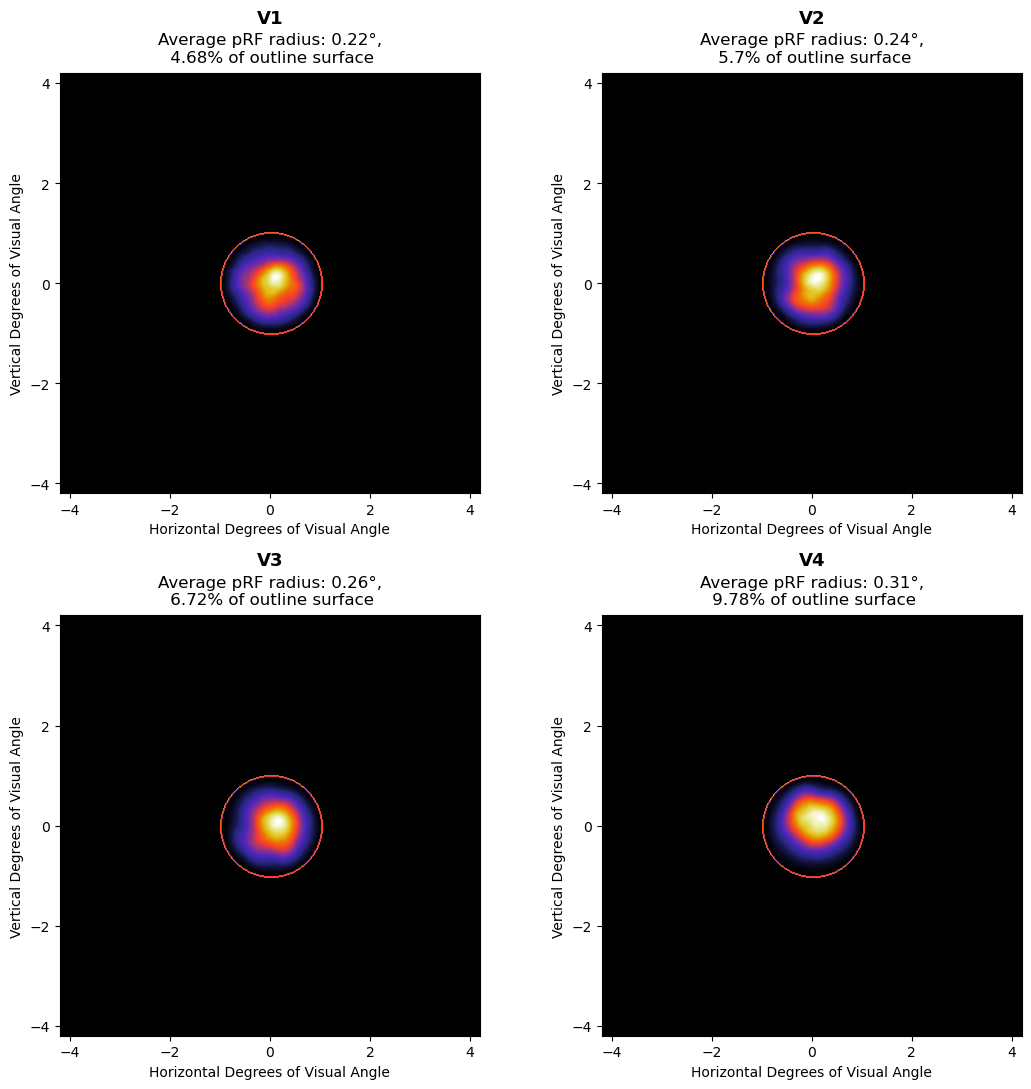

In [300]:
zok = compare_heatmaps_clean('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .1, sigma_max = 1, ecc_max = 1, outline_degs = 1, 
                 filter_dict = None, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

In [313]:
# import pickle
# Save the masks to a local pickle file
with open('prf_selection_mask.pkl', 'wb') as fp:
    pickle.dump(zok, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [315]:


# Load in the saved file
with open('prf_selection_mask.pkl', 'rb') as fp:
    prf_selection_mask = pickle.load(fp)


In [316]:
print(prf_selection_mask['subj01']['V1_mask'])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [324]:
timeseries = get_dat('/home/rfpred/data/natural-scenes-dataset/nsddata_timeseries/ppdata/subj01/func1mm/timeseries/timeseries_session01_run01.nii.gz')


In [361]:
# def roi_filter(roi_mask, input_array):
#     # Check if input_array is 4D
#     if len(input_array.shape) == 4:
#         # Add an extra dimension to roi_mask to match input_array
#         roi_mask = np.expand_dims(roi_mask, -1)
    
#     roi_ices = np.argwhere(roi_mask != 0)

#     # Create list that only contains the voxels of the specific roi
#     roi_ar = np.column_stack((roi_ices, input_array[roi_ices[:, 0], roi_ices[:, 1], roi_ices[:, 2]]))

#     # Filter away the nan values
#     output_roi = roi_ar[~np.isnan(roi_ar).any(axis=1)]

#     rounded_output_roi = np.round(roi_ar, 5)
    
#     # Set print options to control precision and suppress scientific notation
#     np.set_printoptions(precision=5, suppress=True)
    
#     # Create a masked version of the input_array
#     masked_input_array = np.where(roi_mask != 0, input_array, np.nan)
    
#     return rounded_output_roi, output_roi, masked_input_array

In [360]:
# timeseries[0].shape

# print(type(timeseries[0]))

print(prf_selection_mask['subj01']['V1_mask'].shape)

print(timeseries[1][:,:,:,1].shape)




(145, 186, 148)
(145, 186, 148)


In [384]:
filtered_timeseries = roi_filter(prf_selection_mask['subj01']['V1_mask'], timeseries[1])

609.0
(609, 305)


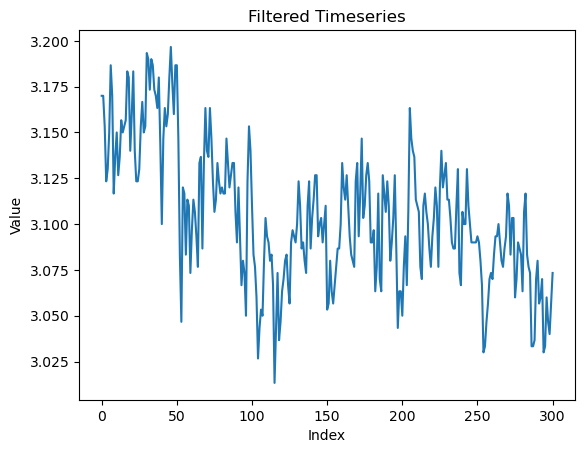

In [394]:
print(np.sum(prf_selection_mask['subj01']['V1_mask']))
print(filtered_timeseries[1].shape)
filtered_timeseries[0][0,:]

fts = filtered_timeseries[0] / 300



import matplotlib.pyplot as plt

# Here the first index is the voxel index. The first 4 are skipped as these are the voxel coordinates, and the 4th I don't really know. (probably 
# because of matlab indexing)
plt.plot(fts[1, 4:])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Filtered Timeseries')
plt.show()


In [321]:
print(np.sum(zok['subj01']['V1_mask']))

print(np.where(prf_selection_mask['subj04']['V1_mask'] == 1))
# print(np.where(zok['subj01']['V2_mask'] == 1))

609.0
(array([56, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60,
       60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
       62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64,
       64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65,
       65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
       65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66,
       66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 71, 74, 75, 75,
       76, 76, 78, 80, 89, 89, 90, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92,
       92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94,
       94, 94, 94,

In [ ]:
# !{sys.executable} -m pip install nsdcode # This does not work, the ones below do
# !{sys.executable} -m pip install -r /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/requirements.txt
# !{sys.executable} -m pip install /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/.


In [ ]:

!{sys.executable} -m pip install numpy